In [1]:
from train import PinkTromboneModel, unnormalize_control
model = PinkTromboneModel.load_from_checkpoint("lightning_logs/version_1/checkpoints/last.ckpt")
model.setup('train')
dataloader = model.train_dataloader()
batch = next(iter(dataloader))
_ = model.eval()

In [7]:
import torch
with torch.no_grad():
    targets = model.transform(batch)
    control = model.encode(targets)
    unnormalized = unnormalize_control(control)
    outputs = model.articulator(unnormalized, unnormalized.shape[2] * 256)

In [16]:
outputs.shape[1]

163584

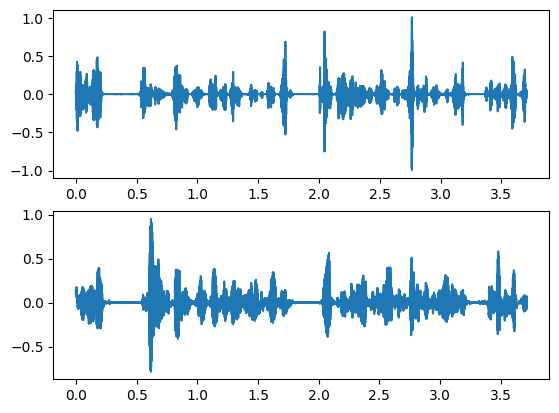

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.subplot(2, 1, 1)
t = np.arange(outputs.shape[1]).astype(np.float64) / 44100
plt.plot(t, outputs[1])
plt.subplot(2, 1, 2)
t = np.arange(batch.shape[1]).astype(np.float64) / 44100
plt.plot(t, batch[1])

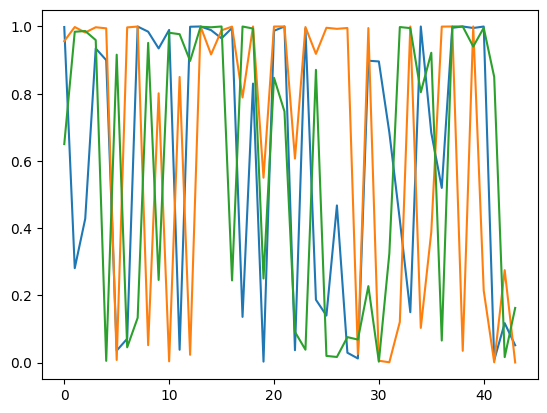

In [26]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(control[2, 5:, 201])
plt.plot(control[0, 5:, 201])
plt.plot(control[1, 5:, 201])

In [20]:
import IPython.display as ipd
ipd.Audio(data=batch[0], rate=22050)

In [21]:
import IPython.display as ipd
ipd.Audio(data=outputs[0], rate=22050)

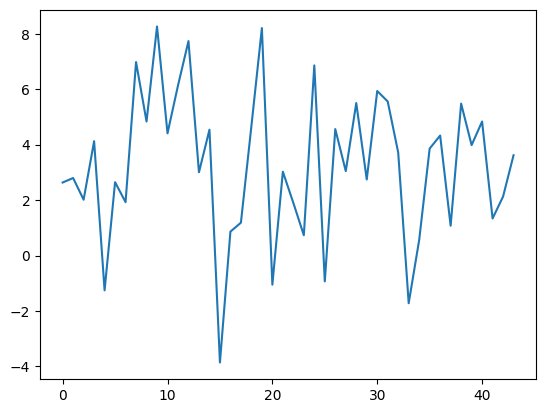

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(unnormalized[0, 5:, 10])

In [65]:
def dummy_data(N=44, T=2000, M=100):
    import numpy as np

    X = np.random.normal(size=(T, N + 5))
    w = np.hamming(M)
    w = w / np.sum(w)
    Y = X[M - 1:, :] * w[0]
    for i in range(1, M):
        # print(X[M-1-i:-i, :].shape)
        Y = Y + X[M-1-i:-i, :] * w[i]
    X = Y
    del Y

    X[:, 0] = X[:, 0] > -.1  # voiced
    X[:, 1] = np.clip(X[:, 1] * 30 + 140 + (44 - N) * 16, 60, 250)  # frequency
    X[:, 2:4] = np.clip(X[:, 2:4] * 5 + 0.7, 0.0, 1.0)  # tenseness
    X[:, 3] = X[:, 2] ** 0.8  # loudness
    X[:, 4] = np.clip(X[:, 4] * 2 + 0.1, 0.01, 0.4)  # velum
    X[:, 6:-1] = (X[:, 5:-2] + X[:, 6:-1] + X[:, 7:]) * 2 + 3.
    X[:, 5:] = np.clip(X[:, 5:], 0., 3.)

    return X

(44,)


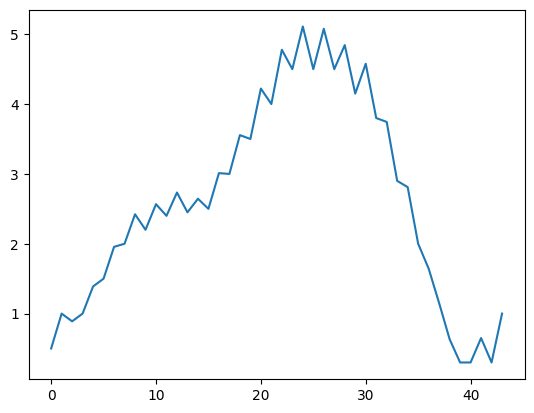

In [66]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([
    float(x) for x in "5 10 20 24 25 35 45 45 38 20 3 10".split()
]) / 10.
y0 = (2 * x[:-2] - x[2:]) / 9 + x[1:-1]
y1 = x[1:-1]
y2 = (2 * x[2:] - x[:-2]) / 9 + x[1:-1]
y3 = (x[2:] + x[1:-1]) / 2
y = np.stack([y0, y1, y2, y3]).T.flatten()
y = np.concatenate([x[:2], y, x[-2:]])
#x = np.sqrt(x)
print(y.shape)
plt.plot(y)
D = np.sqrt(y)

In [71]:
from voice100_pinktrombone import PinkTrombone
N = 44
N = 39
pt = PinkTrombone(N)
data = dummy_data(N)
#data[:, -44:] = D[None, :]
idx = np.round(np.arange(N) * 43 / (N - 1)).astype(int)
data[:, -N:] = D[None, idx]
audio = pt(data)

In [72]:
import IPython.display as ipd
ipd.Audio(data=audio, rate=44100)